## Decision tree 

### gini index  
$${1 - \sum_i{p_i^2}}$$

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
dct=DecisionTreeClassifier(max_depth=None)
dct.fit(X_train,y_train)
dct.score(X_train,y_train)
dct.score(X_test,y_test)

0.9555555555555556

### 그래프 그리기 

In [14]:
import os,sys

In [19]:
# print('\n'.join(sys.path))

In [18]:
# 환경변수에 경로 추가..- 안해줘도 됨..
# os.environ['PATH'] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [31]:
from sklearn.tree import export_graphviz
import graphviz

In [38]:
# out_file = "파일명" 이라고 두면 결과값을 파일로 생성함.
# out_file = None이라고 하면 값 return
export_graphviz(dct,out_file='tree.dot',feature_names=iris_data.feature_names,class_names=iris_data.target_names,filled=True)
# graphviz.Source(export_graphviz(dct,feature_names=iris_data.feature_names,class_names=iris_data.target_names,filled=True))

with open('tree.dot') as f:
    dot_graph = f.read()    
iris_decisionTree_graph = graphviz.Source(dot_graph)

# 그래프 사진으로 저장
# iris_decisionTree_graph.format = 'png'
# iris_decisionTree_graph.render(filename = 'iris_decitionTree_graph.png')

### 가지치기 
- 선가지치기
- 후가지치기

In [39]:
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train,y_train)
print('train accu: ',clf2.score(X_train,y_train))
print('test accu: ',clf2.score(X_test,y_test))

train accu:  0.9809523809523809
test accu:  0.9555555555555556


In [40]:
# importance of variables
dct.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

(-1, 4)

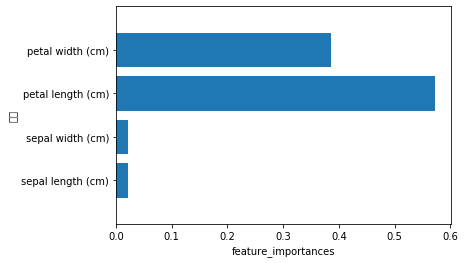

In [10]:
import matplotlib.pyplot as plt
import numpy as np
n_features = iris_data.data.shape[1]
plt.barh(range(n_features),dct.feature_importances_,align='center')
# y 축 숫자 -> 이름
plt.yticks(np.arange(n_features),iris_data.feature_names)
plt.xlabel('feature_importances')
plt.ylabel('특성')
plt.ylim(-1,n_features)